In [1]:
# Importar librerías necesarias
import os  # Para trabajar con rutas del sistema
import pandas as pd  # Para trabajar con dataframes y archivos Excel
import numpy as np  # Para operaciones numéricas
import re  # Para validación de correos electrónicos
from datetime import datetime  # Para trabajar con fechas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from datetime import datetime

In [2]:
Fecha = "20-05-2025"

In [3]:
# Rutas Office
R_MS_SIe = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\SIE\Aseguramiento\ms_sie\Reporte_Validación Archivos Maestro_2025_06_11.csv"
R_MS_ADRES = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Maestro\MS\2025-2\EPS025MS0009062025.TXT"
R_Cod_DANE = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Proyecto INOVA\Colab_Notebooks\dashboard\Base de datos\Codigo DANE\Departamentos.txt"
R_PR = r"\\Servernas\AYC2\ASEGURAMIENTO\ASEGURAMIENTO\PROCESO_ASEGURAMIENTO\REGIMEN SUBSIDIADO\MUNICIPIOS 2025\SEGUIMIENTO NACIMIENTOS\SEGUIMIENTO NACIMIENTOS (version 1).xlsb.xlsx"
R_Sisben = r"\\Servernas\AYC2\ASEGURAMIENTO\ASEGURAMIENTO\PROCESO_ASEGURAMIENTO\REGIMEN SUBSIDIADO\MUNICIPIOS 2025\Sisben\02_Febrero\DNP-SISBEN-CO-0000074572.xlsx"

Ruta_Salida_Actualización_Datos = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #6\ACTIVIDAD 14\Bases de datos notificaciones telefonicas\NOTIFICAR ACTUALIZACION DE DATOS\Actualización de datos_06-2025.xlsx"
Ruta_Salida_Actualización_Documento = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #6\ACTIVIDAD 14\Bases de datos notificaciones telefonicas\ACTUALIZACION DE DOCUMENTO\Actualización_documento-06-2025.xlsx"
Ruta_Salida_No_Sisben = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #6\ACTIVIDAD 14\Bases de datos notificaciones telefonicas\USUARIOS ACTIVOS SIN SISBEN (IV)\No Sisben-06-2025.xlsx"
R_resumen_SIE = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #6\ACTIVIDAD 14\Bases de datos notificaciones telefonicas\resumen SIE.xlsx"
R_MS_SIE_Corre = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #6\ACTIVIDAD 14\Bases de datos notificaciones telefonicas\Validado SIE.xlsx"
R_Sisben_OtroMunicipio = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #6\ACTIVIDAD 14\Bases de datos notificaciones telefonicas\NOTIFICACION SISBEN EN OTRO MUNICIPIO\Sisben otro municipio-06-2025.xlsx"

In [4]:
# Rutas home
#R_MS_SIe = r"D:\OneDrive - uniminuto.edu\Capresoca\AlmostClear\SIE\Aseguramiento\ms_sie\Reporte_Validación Archivos Maestro_2025_05_20.csv"
#R_MS_ADRES = r"D:\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Maestro\MS\2025-2\EPS025MS0019052025.TXT"
#R_Cod_DANE = r"D:\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Constantes\Departamentos.txt"
#R_PR = r"D:\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Seguimiento\Presuntos duplicados\2025\20-05-2025.xlsx"
#R_Sisben = r"D:\OneDrive - uniminuto.edu\Capresoca\AlmostClear\SISBEN\2025\04_Abril\DNP-SISBEN-CO-0000076758.xlsx"

#Ruta_Salida_Actualización_Datos = fr"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #5\ACTIVIDAD 14\Bases de datos notificaciones telefonicas\NOTIFICAR ACTUALIZACION DE DATOS\Actualización de datos-{Fecha}.xlsx"
#Ruta_Salida_Actualización_Documento = fr"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #5\ACTIVIDAD 14\Bases de datos notificaciones telefonicas\ACTUALIZACION DE DOCUMENTO\Actualización_documento-{Fecha}.xlsx"
#Ruta_Salida_No_Sisben = fr"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #5\ACTIVIDAD 14\Bases de datos notificaciones telefonicas\USUARIOS ACTIVOS SIN SISBEN (IV)\No Sisben {Fecha}.xlsx"
#R_resumen_SIE = fr"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #5\ACTIVIDAD 14\Bases de datos notificaciones telefonicas\resumen SIE {Fecha}.xlsx"
#R_MS_SIE_Corre = fr"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #5\ACTIVIDAD 14\Bases de datos notificaciones telefonicas\Validado SIE {Fecha}.xlsx"
#R_Sisben_OtroMunicipio = fr"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #5\ACTIVIDAD 14\Bases de datos notificaciones telefonicas\NOTIFICACION SISBEN EN OTRO MUNICIPIO\Sisben otro municipio {Fecha}.xlsx"

In [5]:
# Cargar el archivo .txt en un DataFrame
df_cod_dane = pd.read_csv(R_Cod_DANE, sep=';', encoding='UTF-8')
df_ms_adres = pd.read_csv(R_MS_ADRES, sep=',', encoding='ansi', header=None)
df_ms_SIE = pd.read_csv(R_MS_SIe, sep=';', encoding='ansi')
# Cargar los datos de la hoja "PR" del archivo Excel en la ruta R_PR
df_PR = pd.read_excel(R_PR, sheet_name="PR", usecols=["T_DOC", "N_DOC"], header=0)
df_Sisben = pd.read_excel(R_Sisben, sheet_name="Resultado")

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_15496\3769054409.py:4: DtypeWarning: Columns (1,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ms_SIE = pd.read_csv(R_MS_SIe, sep=';', encoding='ansi')


In [6]:
# Formatear la columna 'CODIGO' de df_cod_dane para que tenga 5 dígitos
df_cod_dane['CODIGO'] = df_cod_dane['CODIGO'].astype(int).apply(lambda x: f"{x:05d}")

In [7]:
df_ms_SIE = df_ms_SIE[['tipo_documento', 'numero_identificacion', 'celular', 'telefono_1', 'telefono_2', 'correo_electronico']]
cols = ['celular', 'telefono_1', 'telefono_2']
df_ms_SIE[cols] = df_ms_SIE[cols].apply(lambda col: col.str.replace('[- ]', '', regex=True))
def valid_phone(val):
    val_str = str(val)
    if val_str.isdigit() and len(val_str) == 10 and val_str.startswith('3'):
        return val_str
    return ''

df_ms_SIE[cols] = df_ms_SIE[cols].applymap(valid_phone)

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_15496\3950643390.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_ms_SIE[cols] = df_ms_SIE[cols].applymap(valid_phone)


In [8]:
# Definir función para validar correos electrónicos usando expresiones regulares
def is_valid_email(email):
    if pd.isnull(email) or email.strip() == "":
        return False
    # Patrón básico de email
    regex = r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)"
    if not re.match(regex, email):
        return False
    # Validar casos específicos de correos no deseados
    email_lower = email.lower()
    if email_lower in ["actualizar@actualizar.com", "notiene@gamil.com", "00@hotmail.com"]:
        return False
    return True

# Aplicar la validación inicial en la columna 'correo_electronico'
df_ms_SIE['correo_valido'] = df_ms_SIE['correo_electronico'].apply(is_valid_email)

# Extraer solo los correos que pasaron la validación básica para realizar el clustering
df_valid = df_ms_SIE[df_ms_SIE['correo_valido']].copy()

# Convertir los correos en características numéricas usando TF-IDF (con análisis de n-gramas de caracteres)
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 4))
X = vectorizer.fit_transform(df_valid['correo_electronico'])

# Aplicar clustering para identificar grupos de patrones similares
# Puedes ajustar n_clusters según la cantidad y variedad de correos que manejes.
n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_valid['cluster'] = kmeans.fit_predict(X)

# Mostrar la distribución de los clusters para análisis
print("Distribución de clusters:")
print(df_valid['cluster'].value_counts())

# SUPUESTO:
# Luego de inspeccionar los clusters (por ejemplo, revisando una muestra de correos de cada grupo),
# determinamos manualmente que ciertos clusters corresponden a correos válidos.
# Por ejemplo, asumamos que los clusters 0 y 2 contienen patrones de correos populares y válidos,
# mientras que el cluster 1 agrupa correos con estructuras atípicas.
valid_clusters = [1]

# Marcar dentro del subconjunto validado cuáles clusters son considerados válidos
df_valid['cluster_valid'] = df_valid['cluster'].apply(lambda x: x in valid_clusters)

# Función final de validación que combina la validación inicial y la validación basada en clustering
def final_validation(email):
    # Primero se comprueba si el email pasa la validación básica
    if is_valid_email(email):
        # Si es válido, se busca en el conjunto de correos agrupados
        if email in df_valid.loc[df_valid['cluster_valid'], 'correo_electronico'].values:
            return email
        else:
            return ""  # Se descarta el correo si pertenece a un cluster no válido
    else:
        return ""

# Aplicar la validación final en el DataFrame original
df_ms_SIE['correo_electronico'] = df_ms_SIE['correo_electronico'].apply(final_validation)

df_ms_SIE.drop('correo_valido', axis=1, inplace=True)


Distribución de clusters:
cluster
1    38078
2     8119
0     5301
Name: count, dtype: int64


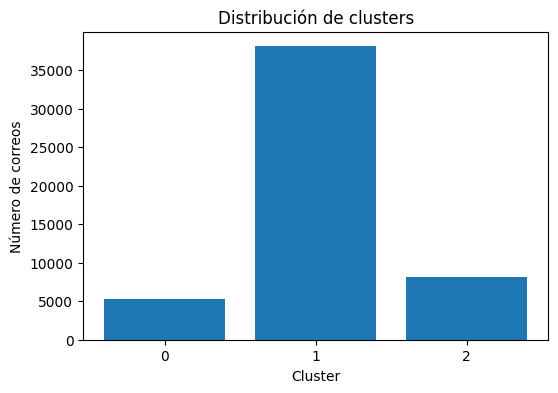

Ejemplos de correos en el cluster 1:
             lauraqui1922@gmail.com
      zairaelianateatin28@gmail.com
            julieth25cruz@gmail.com
             lorensillo04@gmail.com
cuallarodriguezlizvaleria@gmail.com
         jfigueresosierra@gmail.com
          estermorales550@gmail.com
            lorenirta1986@gmail.com
         jsilveralarcon74@gmail.com
          picochaparro754@gmail.com


In [9]:
import matplotlib.pyplot as plt

# 1. Visualizar la distribución de clusters con un gráfico de barras
cluster_counts = df_valid['cluster'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(cluster_counts.index.astype(str), cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Número de correos')
plt.title('Distribución de clusters')
plt.show()

# 2. Mostrar ejemplos de correos de un cluster específico (por ejemplo, cluster 0)
cluster_id = 1  # Cambia este valor para visualizar otro cluster
ejemplos = df_valid[df_valid['cluster'] == cluster_id]['correo_electronico'].head(10)
print(f"Ejemplos de correos en el cluster {cluster_id}:")
print(ejemplos.to_string(index=False))

In [10]:
# Buscar el cluster del correo específico
email_busqueda = "nilsonabril@hotmail.com"
cluster_asignado = df_valid[df_valid['correo_electronico'] == email_busqueda]['cluster']

if not cluster_asignado.empty:
    print(f"El correo {email_busqueda} pertenece al cluster {cluster_asignado.values[0]}")
else:
    print(f"El correo {email_busqueda} no se encontró en el conjunto validado.")


El correo nilsonabril@hotmail.com pertenece al cluster 0


In [11]:
# Contar la cantidad de correos únicos en cada cluster
unique_counts = df_valid.groupby('cluster')['correo_electronico'].nunique()
print(unique_counts)

cluster
0     4147
1    28997
2      155
Name: correo_electronico, dtype: int64


In [12]:
# import pandas as pd
# R_Clusters = r"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #3\ACTIVIDAD 19\19.1. Bases de datos notificaciones telefonicas\NOTIFICAR ACTUALIZACION DE DATOS\Clusters.xlsx"
# # Suponiendo que df_valid es el DataFrame que contiene la columna 'cluster'
# with pd.ExcelWriter(R_Clusters) as writer:
#     # Iterar sobre cada cluster único
#     for cluster in df_valid['cluster'].unique():
#         # Filtrar el DataFrame por el cluster actual
#         cluster_df = df_valid[df_valid['cluster'] == cluster]
#         # Guardar el DataFrame filtrado en una hoja, el nombre de la hoja será "Cluster_<numero>"
#         cluster_df.to_excel(writer, sheet_name=f"Cluster_{cluster}", index=False)

del df_valid, unique_counts

In [13]:
df_ms_SIE['correo_electronico'] = df_ms_SIE['correo_electronico'].apply(
    lambda email: "" if (
        re.search(r'sat', email, re.IGNORECASE) or 
        re.search(r'SAT', email, re.IGNORECASE) or 
        re.search(r'TRASLADO', email, re.IGNORECASE) or 
        re.search(r'ACTUALIZAR', email, re.IGNORECASE) or 
        re.search(r'actualiza', email, re.IGNORECASE) or 
        re.search(r'actualizar', email, re.IGNORECASE) or 
        re.search(r'tiene', email, re.IGNORECASE) or 
        re.search(r'TIENE', email, re.IGNORECASE) or 
        re.search(r'afilia', email, re.IGNORECASE) or 
        re.search(r'traslado', email, re.IGNORECASE) or 
        email.split('@')[0].isdigit()
    ) else email
)

In [14]:
empty_count = df_ms_SIE['correo_electronico'].eq("").sum()
non_empty_count = df_ms_SIE['correo_electronico'].ne("").sum()

print("Cantidad de registros vacíos en 'correo_electronico':", empty_count)
print("Cantidad de registros no vacíos en 'correo_electronico':", non_empty_count)

Cantidad de registros vacíos en 'correo_electronico': 186541
Cantidad de registros no vacíos en 'correo_electronico': 37768


In [15]:
# Definir función para validar correos electrónicos usando expresiones regulares
def is_valid_email(email):
    if pd.isnull(email) or email.strip() == "":
        return False
    # Patrón básico de email
    regex = r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)"
    if not re.match(regex, email):
        return False
    # Validar casos específicos de correos no deseados
    email_lower = email.lower()
    if email_lower in ["actualizar@actualizar.com", "notiene@gamil.com", "00@hotmail.com"]:
        return False
    return True

# Aplicar la validación en la columna 'correo_electronico' y reemplazar los no válidos por cadena vacía
df_ms_SIE['correo_electronico'] = df_ms_SIE['correo_electronico'].apply(lambda x: x if is_valid_email(x) else '')

In [16]:
empty_count = df_ms_SIE['correo_electronico'].eq("").sum()
non_empty_count = df_ms_SIE['correo_electronico'].ne("").sum()

print("Cantidad de registros vacíos en 'correo_electronico':", empty_count)
print("Cantidad de registros no vacíos en 'correo_electronico':", non_empty_count)

Cantidad de registros vacíos en 'correo_electronico': 186541
Cantidad de registros no vacíos en 'correo_electronico': 37768


In [17]:
print(df_ms_SIE[df_ms_SIE['numero_identificacion'] == '1121872381'])

      tipo_documento numero_identificacion celular telefono_1 telefono_2  \
71139             CC            1121872381                                 

      correo_electronico  
71139                     


In [18]:
# Calcular el total de registros de df_ms_SIE
total_registros = df_ms_SIE.shape[0]

tabla = []
columnas = ['celular', 'telefono_1', 'telefono_2', 'correo_electronico']

for col in columnas:
    # Calcular la cantidad de registros vacíos y con datos
    vacios = df_ms_SIE[col].apply(lambda x: pd.isnull(x) or x == "").sum()
    con_dato = total_registros - vacios
    # Calcular porcentajes
    pct_con_dato = (con_dato / total_registros) * 100
    pct_vacios = (vacios / total_registros) * 100
    tabla.append({
        'Columna': col,
        'Total': total_registros,
        'Datos (Cantidad)': con_dato,
        '% Datos': f"{pct_con_dato:.2f}%",
        'Vacíos (Cantidad)': vacios,
        '% Vacíos': f"{pct_vacios:.2f}%"
    })

# Convertir a DataFrame y mostrar la tabla
tabla_df = pd.DataFrame(tabla)
print("Cantidad total de registros en df_ms_SIE:", total_registros)
print(tabla_df)

Cantidad total de registros en df_ms_SIE: 224309
              Columna   Total  Datos (Cantidad) % Datos  Vacíos (Cantidad)  \
0             celular  224309            184676  82.33%              39633   
1          telefono_1  224309            152802  68.12%              71507   
2          telefono_2  224309             92282  41.14%             132027   
3  correo_electronico  224309             37768  16.84%             186541   

  % Vacíos  
0   17.67%  
1   31.88%  
2   58.86%  
3   83.16%  


In [19]:
with pd.ExcelWriter(R_resumen_SIE, engine='xlsxwriter') as writer:
    # Escribir tabla_df en la hoja "Resumen" empezando en la fila 2 (fila 1 para cabecera)
    tabla_df.to_excel(writer, sheet_name='Resumen', index=False, startrow=1)

    workbook  = writer.book
    worksheet = writer.sheets['Resumen']

    # Formato para la cabecera: negrita, ajuste de texto y color de fondo
    header_format = workbook.add_format({
        'bold': True,
        'text_wrap': True,
        'valign': 'vcenter',
        'fg_color': '#DCE6F1',
        'border': 1
    })

    # Aplicar el formato a la cabecera
    for col_num, value in enumerate(tabla_df.columns.values):
        worksheet.write(1, col_num, value, header_format)

    # Definir el rango de datos (la tabla comienza en la fila 2, por lo que cabe recalcular índices)
    nrows = len(tabla_df)
    first_data_row = 2
    last_data_row = first_data_row + nrows - 1

    # Crear un gráfico de columnas para comparar "Datos (Cantidad)" y "Vacíos (Cantidad)"
    chart = workbook.add_chart({'type': 'column'})

    # Agregar serie para "Datos (Cantidad)" (columna 3, índice 2)
    chart.add_series({
        'name':       'Datos (Cantidad)',
        'categories': ['Resumen', first_data_row, 0, last_data_row, 0],
        'values':     ['Resumen', first_data_row, 2, last_data_row, 2],
        'fill':       {'color': '#5B9BD5'},
    })

    # Agregar serie para "Vacíos (Cantidad)" (columna 5, índice 4)
    chart.add_series({
        'name':       'Vacíos (Cantidad)',
        'categories': ['Resumen', first_data_row, 0, last_data_row, 0],
        'values':     ['Resumen', first_data_row, 4, last_data_row, 4],
        'fill':       {'color': '#ED7D31'},
    })

    chart.set_title({'name': 'Resumen de Datos vs Vacíos'})
    chart.set_x_axis({'name': 'Columna'})
    chart.set_y_axis({'name': 'Cantidad'})
    chart.set_style(10)

    # Insertar el gráfico en la hoja (ubicado en la celda H2)
    worksheet.insert_chart('H2', chart, {'x_scale': 1.0, 'y_scale': 1.0})

    # Agregar una breve descripción debajo de la tabla y del gráfico
    description = (
        "La tabla muestra, por cada columna evaluada, el total de registros, "
        "la cantidad de registros con datos y la cantidad de registros vacíos. "
        "La gráfica ilustra visualmente la comparación entre los registros con datos "
        "y aquellos que están vacíos, facilitando la identificación de áreas que requieran atención."
    )
    worksheet.write(last_data_row + 3, 0, description)

In [20]:
df_ms_SIE.columns

Index(['tipo_documento', 'numero_identificacion', 'celular', 'telefono_1',
       'telefono_2', 'correo_electronico'],
      dtype='object')

In [21]:
# Crear la nueva columna "municipio" con el formato deseado:
df_ms_adres['municipio'] = (
    df_ms_adres[23].astype(int).apply(lambda x: f"{x:02d}") +
    df_ms_adres[24].astype(int).apply(lambda x: f"{x:03d}")
)

# Eliminar las columnas 23 y 24
df_ms_adres.drop(columns=[23, 24], inplace=True)

df_ms_adres = df_ms_adres.merge(
    df_cod_dane[['CODIGO', 'Nombre Departamento', 'Nombre Municipio']],
    left_on='municipio',
    right_on='CODIGO',
    how='left'
)
df_ms_adres.drop('CODIGO', axis=1, inplace=True)

# Convertir la columna 5 de df_ms_adres a string para asegurar la coincidencia
df_ms_adres[5] = df_ms_adres[5].astype(str)
df_ms_SIE['numero_identificacion'] = df_ms_SIE['numero_identificacion'].astype(str)

# Seleccionar las columnas a unir de df_ms_SIE
cols_to_merge = ['numero_identificacion', 'celular', 'telefono_1', 'telefono_2', 'correo_electronico']

# Realizar el merge usando la columna "numero_identificacion" de df_ms_SIE y la columna 5 de df_ms_adres
df_ms_adres = df_ms_adres.merge(df_ms_SIE[cols_to_merge],
                                                      left_on=5,
                                                      right_on='numero_identificacion',
                                                      how='left')
# Si ya no se necesita la columna duplicada, se puede eliminar
df_ms_adres.drop('numero_identificacion', axis=1, inplace=True)

In [22]:
# Guardar df_ms_SIE en la ruta especificada como un archivo Excel
df_ms_SIE.to_excel(R_MS_SIE_Corre, index=False)

In [23]:
df_ms_adres

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,municipio,Nombre Departamento,Nombre Municipio,celular,telefono_1,telefono_2,correo_electronico
0,122626068,EPS025,PT,1.238753e+06,RC,1222147346,HIGUERA,PACHECO,AZIEL,JEREMIAS,...,B02,SIV(A05),0,08758,ATLÁNTICO,SOLEDAD,3243984140,3243984140,,PORIANA998@GMAIL.COM
1,122651370,EPS025,NaN,NaN,RC,1115871458,SALAZAR,PLAZAS,MIRARY,ALAIHA,...,NaN,NaN,0,11001,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3102021437,,,
2,69414419,EPS025,NaN,NaN,CC,23906077,LARGO,DE PIRABAN,EMILIANA,NaN,...,NaN,NaN,0,15533,BOYACÁ,PAYA,,,,
3,69414982,EPS025,NaN,NaN,CC,1111064,CACHAY,QUIQUIVE,ADELFO,NaN,...,NaN,NaN,0,15533,BOYACÁ,PAYA,,,,
4,78742187,EPS025,NaN,NaN,CC,1118536120,CORREDOR,CACHAY,NELDA,TEREZA,...,NaN,SIV(C10),1,15533,BOYACÁ,PAYA,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175569,114350594,EPS025,NaN,NaN,TI,1115867103,SANABRIA,SIBO,SAMUEL,ESTEBAN,...,A05,SIV(B01),0,85250,CASANARE,PAZ DE ARIPORO,3202485870,3202485870,3202485870,
175570,114317069,EPS025,NaN,NaN,TI,1118575864,NUÑEZ,FONSECA,JHOJAN,DIRBEY,...,A02,SIV(A02),0,85139,CASANARE,MANÍ,3229029844,3123414212,3229029844,
175571,119775272,EPS025,TI,1.115852e+09,RC,1117461286,PJEPJEDI,MASIWAR,JHOLDAN,ALFREDO,...,NaN,LC(17),0,85250,CASANARE,PAZ DE ARIPORO,3250245202,,,
175572,120009749,EPS025,NaN,NaN,PT,5814421,GIL,NaN,THALIA,CAROLINA,...,B03,SIV(A04),0,85001,CASANARE,YOPAL,3124265242,,,


# 1. NOTIFICAR ACTUALIZACION DE DATOS

Se organiza la base de datos de los usuarios sin correo para notivicar via mensaje de texto para que actualicen un correo y las personas sin telefono pero con correo electronico para que actualicen numeros de telefono.

In [24]:
# Filtrar el DataFrame según las condiciones
Df_Actualizacion_Datos = df_ms_adres[
    (df_ms_adres[2].isnull() | (df_ms_adres[2] == '')) &  # Columna 2 vacía o nula
    (df_ms_adres[33] == 'AC') &  # Columna 33 igual a 'AC'
    (df_ms_adres[42] == 0)  # Columna 42 igual a 0
]
#Df_Actualizacion_Datos = Df_Actualizacion_Datos.iloc[:, list(range(4, 12)) + ['Nombre Departamento', 'Nombre Municipio', 'celular', 'telefono_1', 'telefono_2', 'correo_electronico']]

# Obtener los nombres de las columnas correspondientes a los índices del 4 al 11
cols_por_indice = Df_Actualizacion_Datos.columns[4:12].tolist()
# Combinar con las columnas adicionales
columnas_finales = cols_por_indice + ['Nombre Departamento', 'Nombre Municipio', 'celular', 'telefono_1', 'telefono_2', 'correo_electronico']
Df_Actualizacion_Datos = Df_Actualizacion_Datos.loc[:, columnas_finales]

In [25]:
# Filtrar los registros donde todas las columnas de contacto están vacías o nulas
df_sin_datos = Df_Actualizacion_Datos[
    Df_Actualizacion_Datos[['celular', 'telefono_1', 'telefono_2', 'correo_electronico']].isnull().all(axis=1) |
    Df_Actualizacion_Datos[['celular', 'telefono_1', 'telefono_2', 'correo_electronico']].eq("").all(axis=1)
]

# Filtrar los registros donde al menos una de las columnas de teléfono no está vacía y el correo está vacío
df_telefonos = Df_Actualizacion_Datos[
    Df_Actualizacion_Datos[['celular', 'telefono_1', 'telefono_2']].notnull().any(axis=1) &
    Df_Actualizacion_Datos[['celular', 'telefono_1', 'telefono_2']].ne("").any(axis=1) &
    (Df_Actualizacion_Datos['correo_electronico'].isnull() | Df_Actualizacion_Datos['correo_electronico'].eq(""))
]

# Filtrar los registros donde todas las columnas de teléfono están vacías y el correo no está vacío
df_correo = Df_Actualizacion_Datos[
    (Df_Actualizacion_Datos[['celular', 'telefono_1', 'telefono_2']].isnull().all(axis=1) |
     Df_Actualizacion_Datos[['celular', 'telefono_1', 'telefono_2']].eq("").all(axis=1)) &
    Df_Actualizacion_Datos['correo_electronico'].notnull() &
    Df_Actualizacion_Datos['correo_electronico'].str.strip().ne("")
]

# Filtrar los registros donde al menos una de las columnas de teléfono no está vacía y el correo tampoco está vacío
df_ok = Df_Actualizacion_Datos[
    Df_Actualizacion_Datos[['celular', 'telefono_1', 'telefono_2']].notnull().any(axis=1) &
    Df_Actualizacion_Datos[['celular', 'telefono_1', 'telefono_2']].ne("").any(axis=1) &
    Df_Actualizacion_Datos['correo_electronico'].notnull() &
    Df_Actualizacion_Datos['correo_electronico'].ne("")
]

In [26]:
# Verificar el valor del registro "1151188288" en la columna 5 y correo_electronico
registro = Df_Actualizacion_Datos[Df_Actualizacion_Datos[5] == "1151188288"]
print("Registro encontrado:")
print(registro[['correo_electronico']])

Registro encontrado:
       correo_electronico
162965                NaN


In [27]:
df_ok

,4,5,6,7,8,9,10,11,Nombre Departamento,Nombre Municipio,celular,telefono_1,telefono_2,correo_electronico
141,CC,9657020,LARA,NaN,ERNESTO,ALFONSO,29/10/1968,M,CASANARE,YOPAL,3106446543,3106446543,,ivonsolucionescontables@gmail.com
144,CC,1116554776,SANCHEZ,AGUILAR,ANGIE,YELITZA,03/10/1998,F,CASANARE,AGUAZUL,3025651262,3025651262,,josefinaaguilar35@gamil.com
157,CC,1006450625,ALVARADO,GOMEZ,EYNER,YONENCY,05/03/2001,M,CASANARE,TRINIDAD,3125876665,3219724914,,alvarado.einer2@gmail.com
165,CC,9397773,SANABRIA,MEDINA,ALBERTO,NaN,12/02/1972,M,CASANARE,YOPAL,3124494242,,,ALBERTOSANABRIA1972@GMAIL.COM
167,CC,47437133,PEÑALOZA,NaN,SHIRLEY,SUSANA,27/09/1978,F,CASANARE,YOPAL,3142195278,3142195278,3142195278,carlosestebannaranjo09@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175543,CC,1006636202,BENITEZ,ACHAGUA,MARIA,ANITA,12/09/1996,F,CASANARE,NUNCHÍA,3145186375,3145186375,3124247413,Calesillo.20@gmail.com
175545,CC,1048822935,CORDOBA,MARQUEZ,JOSE,ANIBAL,06/08/1995,M,CASANARE,TÁMARA,3148390890,3148390890,,pinedaduranjose965@gmail.com
175555,CC,74846781,GARCIA,MILLAN,JOSE,MANUEL,17/12/1959,M,CASANARE,TRINIDAD,3135029724,3142478641,3142478641,actulizar@actulizar.com
175562,TI,1116555831,RODRIGUEZ,RODRIGUEZ,JOSE,LUIS,11/11/2017,M,CASANARE,AGUAZUL,3133111299,3133111299,3133111299,mariaelenarodriguez1908@gmail.com


In [28]:
import os

# Crear las tablas resumen
resumen1 = pd.DataFrame({
    "Grupo": ["Sin Datos", "Telefonos", "Correo", "OK"],
    "Cantidad": [len(df_sin_datos), len(df_telefonos), len(df_correo), len(df_ok)],
    "Descripción": [
        "Registros sin ningún dato de contacto",
        "Registros con al menos un teléfono pero sin correo",
        "Registros con correo pero sin teléfonos",
        "Registros con ambos datos completos"
    ]
})

municipios = Df_Actualizacion_Datos["Nombre Municipio"].unique()
lista = []
for mun in municipios:
    count_sin = df_sin_datos["Nombre Municipio"].eq(mun).sum()
    count_tel = df_telefonos["Nombre Municipio"].eq(mun).sum()
    count_cor = df_correo["Nombre Municipio"].eq(mun).sum()
    count_ok  = df_ok["Nombre Municipio"].eq(mun).sum()
    lista.append({
        "Nombre Municipio": mun,
        "Sin Datos": count_sin,
        "Telefonos": count_tel,
        "Correo": count_cor,
        "OK": count_ok
    })
resumen2 = pd.DataFrame(lista)

# Agregar una fila de totales a cada tabla
total_resumen1 = pd.DataFrame({
    "Grupo": ["Total"],
    "Cantidad": [resumen1["Cantidad"].sum()],
    "Descripción": [""]
})
resumen1 = pd.concat([resumen1, total_resumen1], ignore_index=True)

total_resumen2 = pd.DataFrame({
    "Nombre Municipio": ["Total"],
    "Sin Datos": [resumen2["Sin Datos"].sum()],
    "Telefonos": [resumen2["Telefonos"].sum()],
    "Correo": [resumen2["Correo"].sum()],
    "OK": [resumen2["OK"].sum()]
})
resumen2 = pd.concat([resumen2, total_resumen2], ignore_index=True)

# Crear el Excel con los 4 dataframes y la hoja resumen.
with pd.ExcelWriter(Ruta_Salida_Actualización_Datos, engine='xlsxwriter') as writer:
    # Escribir cada dataframe en su respectiva hoja
    df_sin_datos.to_excel(writer, sheet_name="Sin_Datos", index=False)
    df_telefonos.to_excel(writer, sheet_name="Telefonos", index=False)
    df_correo.to_excel(writer, sheet_name="Correo", index=False)
    df_ok.to_excel(writer, sheet_name="OK", index=False)
    
    # Crear hoja Resumen y preparar formatos
    resumen_sheet_name = "Resumen"
    resumen_ws = writer.book.add_worksheet(resumen_sheet_name)
    
    # Create formats for header, cells and totales
    header_format = writer.book.add_format({
        'bold': True,
        'text_wrap': True,
        'valign': 'middle',
        'align': 'center',
        'fg_color': '#DCE6F1',
        'border': 1
    })
    cell_format = writer.book.add_format({
        'border': 1,
        'valign': 'top'
    })
    total_cell_format = writer.book.add_format({
        'border': 1,
        'valign': 'top',
        'bold': True,
        'bg_color': '#FFD700'
    })
    
    # Ajustar ancho de columnas para la primera tabla
    resumen_ws.set_column('A:C', 25)
    
    # Escribir encabezado de resumen1
    for col_num, value in enumerate(resumen1.columns.tolist()):
         resumen_ws.write(0, col_num, value, header_format)
    # Escribir datos de resumen1 (resaltando la fila de totales)
    for row_idx, row in resumen1.iterrows():
         fmt = total_cell_format if row_idx == len(resumen1)-1 else cell_format
         for col_idx, cell_val in enumerate(row.tolist()):
             resumen_ws.write(row_idx + 1, col_idx, cell_val, fmt)
    
    # Insertar el gráfico basado en resumen1
    chart1 = writer.book.add_chart({'type': 'column'})
    chart1.add_series({
        'name':       'Cantidad de Registros',
        'categories': [resumen_sheet_name, 1, 0, len(resumen1)-1, 0],
        'values':     [resumen_sheet_name, 1, 1, len(resumen1)-1, 1],
        'fill':       {'color': '#5B9BD5'},
    })
    chart1.set_title({'name': 'Cantidad de Registros por Grupo'})
    chart1.set_x_axis({'name': 'Grupo'})
    chart1.set_y_axis({'name': 'Cantidad'})
    chart1.set_style(11)
    
    # Insertar el gráfico en la hoja Resumen en la celda E2 con escalado
    resumen_ws.insert_chart('E2', chart1, {'x_scale': 1.2, 'y_scale': 1.2})
    
    # Escribir la segunda tabla resumen (resumen2) a partir de la fila siguiente a resumen1
    start_row = len(resumen1) + 3
    # Ajustar ancho de columnas para resumen2
    resumen_ws.set_column(start_row, start_row+4, 20)
    
    # Escribir encabezado de resumen2
    for col_num, value in enumerate(resumen2.columns.tolist()):
         resumen_ws.write(start_row, col_num, value, header_format)
    # Escribir datos de resumen2 (resaltando la fila de totales)
    for i, row in resumen2.iterrows():
         fmt = total_cell_format if i == len(resumen2)-1 else cell_format
         for col_num, cell_val in enumerate(row.tolist()):
             resumen_ws.write(start_row + i + 1, col_num, cell_val, fmt)
    
    # Agregar una descripción debajo de la segunda tabla
    desc_row = start_row + len(resumen2) + 3
    resumen_ws.set_row(desc_row, 30)
    desc_format = writer.book.add_format({'italic': True, 'font_color': '#595959'})
    descripcion = "La primera tabla muestra la cantidad de registros por cada grupo de validación de datos de contacto. El gráfico ilustra visualmente estas cantidades. La segunda tabla detalla, para cada 'Nombre Municipio', cuántos registros corresponden a cada grupo."
    resumen_ws.write(desc_row, 0, descripcion, desc_format)
    
print("Archivo Excel guardado en:", Ruta_Salida_Actualización_Datos)

Archivo Excel guardado en: C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #6\ACTIVIDAD 14\Bases de datos notificaciones telefonicas\NOTIFICAR ACTUALIZACION DE DATOS\Actualización de datos_06-2025.xlsx


# 2. NOTIFICAR ACTUALIZACION DE DOCUMENTO

Se organiza la base de datos de los usuarios para evolución de documento

In [29]:
# Filtrar el DataFrame según las condiciones
Df_Actualizacion_Documento = df_ms_adres[
    (df_ms_adres[33] == 'AC') &  # Columna 33 igual a 'AC'
    (df_ms_adres[42] == 0) &  # Columna 37 igual a 0
    (df_ms_adres[4].isin(['CN', 'RC', 'TI']))  # Columna 4 debe ser NC, RC o TI
]
#Df_Actualizacion_Documento = Df_Actualizacion_Documento.iloc[:, list(range(4, 12)) + ['Nombre Departamento', 'Nombre Municipio', 'celular', 'telefono_1', 'telefono_2', 'correo_electronico']]

# Obtener los nombres de las columnas correspondientes a los índices del 4 al 11
cols_por_indice = Df_Actualizacion_Documento.columns[4:12].tolist()
# Combinar con las columnas adicionales
columnas_finales = cols_por_indice + ['Nombre Departamento', 'Nombre Municipio', 'celular', 'telefono_1', 'telefono_2', 'correo_electronico']
Df_Actualizacion_Documento = Df_Actualizacion_Documento.loc[:, columnas_finales]

#Excluye los Presuntos Repetidos PR
# Convertir las columnas a tipo string para asegurar coincidencias exactas
Df_Actualizacion_Documento[5] = Df_Actualizacion_Documento[5].astype(str)
df_PR["N_DOC"] = df_PR["N_DOC"].astype(str)

# Eliminar registros donde las columnas 'celular', 'telefono_1', 'telefono_2' sean vacías o nulas
Df_Actualizacion_Documento = Df_Actualizacion_Documento[
    ~Df_Actualizacion_Documento[['celular', 'telefono_1', 'telefono_2']].isnull().all(axis=1) &
    ~Df_Actualizacion_Documento[['celular', 'telefono_1', 'telefono_2']].eq("").all(axis=1)
]
# Excluir los registros que están en df_PR
Df_Actualizacion_Documento = Df_Actualizacion_Documento[~Df_Actualizacion_Documento[5].isin(df_PR["N_DOC"])]

Df_Actualizacion_Documento.rename(columns={10: "fecha_nacimiento"}, inplace=True)

In [30]:
# Fecha actual del sistema
current_date = datetime.today()

# Convierte explícitamente la columna a datetime indicando el formato exacto dd/mm/yyyy
Df_Actualizacion_Documento['fecha_nacimiento'] = pd.to_datetime(
    Df_Actualizacion_Documento['fecha_nacimiento'], format='%d/%m/%Y', errors='coerce'
)

# Realiza el cálculo correctamente usando `.dt`
birth = Df_Actualizacion_Documento['fecha_nacimiento']
has_had_birthday = (
    (current_date.month > birth.dt.month) |
    ((current_date.month == birth.dt.month) & (current_date.day >= birth.dt.day))
)

# Calcula la edad exacta
Df_Actualizacion_Documento['edad'] = (
    current_date.year - birth.dt.year - (~has_had_birthday).astype(int)
)

In [31]:
# Contar el número de registros antes del proceso
initial_count = Df_Actualizacion_Documento.shape[0]

# Crear la nueva columna "Evolución" con valor por defecto "ok"
Df_Actualizacion_Documento["Evolución"] = "ok"

# Definir las condiciones según lo solicitado:
mask_CN = (Df_Actualizacion_Documento[4] == "CN")
mask_RC = (Df_Actualizacion_Documento[4] == "RC") & (Df_Actualizacion_Documento["edad"] > 7)
mask_TI = (Df_Actualizacion_Documento[4] == "TI") & (Df_Actualizacion_Documento["edad"] > 18)

# Asignar los valores correspondientes a la columna "Evolución"
Df_Actualizacion_Documento.loc[mask_CN, "Evolución"] = "evolucion CN a RC"
Df_Actualizacion_Documento.loc[mask_RC, "Evolución"] = "evolución RC a TI"
Df_Actualizacion_Documento.loc[mask_TI, "Evolución"] = "evolución de TI a CC"

# Eliminar los registros en los que "Evolución" es "ok"
df_evolucion = Df_Actualizacion_Documento[Df_Actualizacion_Documento["Evolución"] != "ok"].copy()

# Contar el número de registros después del proceso
final_count = df_evolucion.shape[0]

print(f"Registros antes del proceso: {initial_count}")
print(f"Registros después del proceso: {final_count}")

Registros antes del proceso: 41459
Registros después del proceso: 580


In [32]:
evol_values = Df_Actualizacion_Documento["Evolución"].unique()

def safe_sheet_name(name):
    return name if len(name) <= 31 else name[:31]

with pd.ExcelWriter(Ruta_Salida_Actualización_Documento, engine='xlsxwriter') as writer:
    workbook = writer.book
    # Formatos para cabeceras, celdas y totales
    header_format = workbook.add_format({
        'bold': True,
        'bg_color': '#DCE6F1',
        'border': 1,
        'align': 'center',
        'valign': 'vcenter'
    })
    cell_format = workbook.add_format({
        'border': 1,
        'valign': 'vcenter'
    })
    total_cell_format = workbook.add_format({
        'border': 1,
        'valign': 'vcenter',
        'bold': True,
        'bg_color': '#FFD700'
    })
    
    # Crear hojas por cada grupo de "Evolución", omitiendo la categoría "ok"
    for ev in evol_values:
        if ev == "ok":
            continue
        sheet_name = safe_sheet_name(ev)
        df_group = Df_Actualizacion_Documento[Df_Actualizacion_Documento["Evolución"] == ev]
        df_group.to_excel(writer, sheet_name=sheet_name, index=False)
    
    # Crear hoja "Resumen"
    resumen_sheet = "Resumen"
    resumen_ws = workbook.add_worksheet(resumen_sheet)
    
    start_row = 1
    # ====================
    # Tabla: Resumen Evolución (sin la categoría "ok")
    resumen_doc = Df_Actualizacion_Documento[Df_Actualizacion_Documento["Evolución"] != "ok"]\
                    .groupby("Evolución").size().reset_index(name="Cantidad")
    descripciones = {
        "evolucion CN a RC": "Registros que deben evolucionar de CN a RC",
        "evolución RC a TI": "Registros que deben evolucionar de RC a TI",
        "evolución de TI a CC": "Registros que deben evolucionar de TI a CC"
    }
    resumen_doc["Descripción"] = resumen_doc["Evolución"].map(descripciones)
    total_val = resumen_doc["Cantidad"].sum()
    total_row = pd.DataFrame({"Evolución": ["Total"], "Cantidad": [total_val], "Descripción": [""]})
    resumen_doc = pd.concat([resumen_doc, total_row], ignore_index=True)
    
    resumen_ws.write(0, 0, "Resumen Documentos", header_format)
    # Escribir encabezados
    for col_num, col_name in enumerate(resumen_doc.columns):
         resumen_ws.write(start_row, col_num, col_name, header_format)
    # Escribir datos
    for r_idx, row in resumen_doc.iterrows():
         fmt = total_cell_format if row["Evolución"] == "Total" else cell_format
         for c_idx, value in enumerate(row):
              resumen_ws.write(start_row + 1 + r_idx, c_idx, value, fmt)
    nrows_doc = len(resumen_doc) + 1  # Incluye encabezados

    # Agregar gráfica para visualizar el resumen de evolución
    chart = workbook.add_chart({'type': 'column'})
    chart.add_series({
         'name':       'Cantidad',
         'categories': [resumen_sheet, start_row + 1, 0, start_row + nrows_doc - 1, 0],
         'values':     [resumen_sheet, start_row + 1, 1, start_row + nrows_doc - 1, 1],
         'data_labels': {'value': True},
    })
    chart.set_title({'name': 'Resumen Evolución'})
    chart.set_x_axis({'name': 'Evolución'})
    chart.set_y_axis({'name': 'Cantidad'})
    # Insertar la gráfica debajo de la tabla
    resumen_ws.insert_chart(start_row + nrows_doc + 1, 0, chart)
    
    # ====================
    # Tabla: Resumen por Municipio según categorías de "Evolución" (omitiendo "ok")
    resumen_mun = Df_Actualizacion_Documento[Df_Actualizacion_Documento["Evolución"] != "ok"]\
                    .pivot_table(
                        index="Nombre Municipio", 
                        columns="Evolución", 
                        aggfunc='size', 
                        fill_value=0
                    ).reset_index()
    
    # Reordenar columnas para incluir solo las categorías necesarias
    cols_evol = ["evolucion CN a RC", "evolución RC a TI", "evolución de TI a CC"]
    cols_final = ["Nombre Municipio"] + [col for col in cols_evol if col in resumen_mun.columns]
    resumen_mun = resumen_mun[cols_final]
    
    # Agregar fila de totales
    total_vals = resumen_mun.select_dtypes(include='number').sum()
    total_vals["Nombre Municipio"] = "Total"
    total_vals = pd.DataFrame([total_vals])
    resumen_mun = pd.concat([resumen_mun, total_vals], ignore_index=True)
    
    table3_row = start_row + nrows_doc + 2  # Dejar dos filas en blanco
    resumen_ws.write(table3_row - 1, 0, "Resumen por Municipio", header_format)
    # Encabezados de la Tabla 3
    for col_num, col_name in enumerate(resumen_mun.columns):
         resumen_ws.write(table3_row, col_num, col_name, header_format)
    # Datos
    for r_idx, row in resumen_mun.iterrows():
         fmt = total_cell_format if row["Nombre Municipio"] == "Total" else cell_format
         for c_idx, value in enumerate(row):
              resumen_ws.write(table3_row + 1 + r_idx, c_idx, value, fmt)
              
print("Archivo Excel guardado en:", Ruta_Salida_Actualización_Documento)

Archivo Excel guardado en: C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #6\ACTIVIDAD 14\Bases de datos notificaciones telefonicas\ACTUALIZACION DE DOCUMENTO\Actualización_documento-06-2025.xlsx


# 3. USUARIOS ACTIVOS SIN SISBEN (IV)
Notificar a la población, no listado sensal o sin siben para que actualicen sus datos en las tablas de referencia y saquen sisben o validen su listado censal

In [33]:
# Filtrar el DataFrame según las condiciones
Df_No_Sisben = df_ms_adres


Df_No_Sisben = Df_No_Sisben[
    ~Df_No_Sisben[41].str.contains(
        r"LC\(9\)|LC\(17\)|LC\(1\)|LC\(2\)|LC\(28\)|LC\(16\)|"
        r"SIV\(B\d+\)|SIV\(A\d+\)|SIV\(C\d+\)|"
        r"LC\((?:[^)]*\b(9|2|17|1|22)\b[^)]*)\)", 
        regex=True, 
        na=False
    )
]



Df_No_Sisben = Df_No_Sisben[
    (Df_No_Sisben[2].isnull() | (Df_No_Sisben[2] == '')) &  # Columna 2 vacía o nula
    (Df_No_Sisben[19] != 34) &  # Columna 14 diferente a a población 34
    (Df_No_Sisben[33] == 'AC') &  # Columna 28 igual a 'AC'
    (Df_No_Sisben[42] == 0)  # Columna 37 igual a 0
]

# Obtener los nombres de las columnas correspondientes a los índices del 4 al 11
cols_por_indice = Df_No_Sisben.columns[4:12].tolist() + [Df_No_Sisben.columns[40]]
# Combinar con las columnas adicionales
columnas_finales = cols_por_indice + ['Nombre Departamento', 'Nombre Municipio', 'celular', 'telefono_1', 'telefono_2', 'correo_electronico']
Df_No_Sisben = Df_No_Sisben.loc[:, columnas_finales]

# Eliminar registros donde las columnas 'celular', 'telefono_1', 'telefono_2' sean vacías o nulas
Df_No_Sisben = Df_No_Sisben[
    ~Df_No_Sisben[['celular', 'telefono_1', 'telefono_2']].isnull().all(axis=1) &
    ~Df_No_Sisben[['celular', 'telefono_1', 'telefono_2']].eq("").all(axis=1)
]

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_15496\3448605583.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ~Df_No_Sisben[41].str.contains(


In [34]:
import pandas as pd

# Crear la tabla resumen por "Nombre Municipio"
resumen_municipios = Df_No_Sisben.groupby('Nombre Municipio').size().reset_index(name='Cantidad')
# Agregar una fila con el total de registros
total_fila = pd.DataFrame({'Nombre Municipio': ['Total'], 'Cantidad': [resumen_municipios['Cantidad'].sum()]})
resumen_municipios = pd.concat([resumen_municipios, total_fila], ignore_index=True)

# Guardar en un archivo Excel
with pd.ExcelWriter(Ruta_Salida_No_Sisben, engine='xlsxwriter') as writer:
    # Guardar el DataFrame original en una hoja
    Df_No_Sisben.to_excel(writer, sheet_name='Datos', index=False)
    
    # Guardar la tabla resumen en otra hoja
    resumen_municipios.to_excel(writer, sheet_name='Resumen', index=False, startrow=1)
    
    # Obtener el workbook y worksheet para aplicar formatos
    workbook = writer.book
    worksheet = writer.sheets['Resumen']
    
    # Formato para la cabecera
    header_format = workbook.add_format({
        'bold': True,
        'text_wrap': True,
        'valign': 'middle',
        'align': 'center',
        'fg_color': '#DCE6F1',
        'border': 1
    })
    
    # Formato para las celdas
    cell_format = workbook.add_format({
        'border': 1,
        'valign': 'middle'
    })
    
    # Formato para la fila de totales
    total_format = workbook.add_format({
        'bold': True,
        'border': 1,
        'valign': 'middle',
        'fg_color': '#FFD700'
    })
    
    # Aplicar formato a la cabecera
    for col_num, value in enumerate(resumen_municipios.columns):
        worksheet.write(1, col_num, value, header_format)
    
    # Aplicar formato a las celdas
    for row_num, row_data in resumen_municipios.iterrows():
        fmt = total_format if row_data['Nombre Municipio'] == 'Total' else cell_format
        for col_num, cell_value in enumerate(row_data):
            worksheet.write(row_num + 2, col_num, cell_value, fmt)
    
    # Ajustar el ancho de las columnas
    worksheet.set_column('A:A', 30)
    worksheet.set_column('B:B', 15)

print(f"Archivo guardado en: {Ruta_Salida_No_Sisben}")

Archivo guardado en: C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #6\ACTIVIDAD 14\Bases de datos notificaciones telefonicas\USUARIOS ACTIVOS SIN SISBEN (IV)\No Sisben-06-2025.xlsx


# 4 NOTIFICACION SISBEN EN OTRO MUNICIPIO

In [35]:
# Filtrar el DataFrame según las condiciones
Df_Sisben_Otro_Municipio = df_ms_adres

Df_Sisben_Otro_Municipio = Df_Sisben_Otro_Municipio[
    (Df_Sisben_Otro_Municipio[2].isnull() | (Df_Sisben_Otro_Municipio[2] == '')) &  # Columna 2 vacía o nula
    (Df_Sisben_Otro_Municipio[19] == 34) |  # Columna 14 igual a a población 34
    (Df_Sisben_Otro_Municipio[19] == 5) &  # Columna 14 igual a a población 5
    (Df_Sisben_Otro_Municipio[33] == 'AC') &  # Columna 28 igual a 'AC'
    (Df_Sisben_Otro_Municipio[42] == 0)  # Columna 37 igual a 0
]

# Obtener los nombres de las columnas correspondientes a los índices del 4 al 11
cols_por_indice = Df_Sisben_Otro_Municipio.columns[4:12].tolist() + [Df_Sisben_Otro_Municipio.columns[40]]
# Combinar con las columnas adicionales
columnas_finales = cols_por_indice + ['municipio', 'Nombre Departamento', 'Nombre Municipio', 'celular', 'telefono_1', 'telefono_2', 'correo_electronico']
Df_Sisben_Otro_Municipio = Df_Sisben_Otro_Municipio.loc[:, columnas_finales]

# Eliminar registros donde las columnas 'celular', 'telefono_1', 'telefono_2' sean vacías o nulas
Df_Sisben_Otro_Municipio = Df_Sisben_Otro_Municipio[
    ~Df_Sisben_Otro_Municipio[['celular', 'telefono_1', 'telefono_2']].isnull().all(axis=1) &
    ~Df_Sisben_Otro_Municipio[['celular', 'telefono_1', 'telefono_2']].eq("").all(axis=1)
]

# Asegurarse de que las columnas de unión sean del mismo tipo
df_Sisben['numeroDocumento'] = df_Sisben['numeroDocumento'].astype(str)
Df_Sisben_Otro_Municipio[5] = Df_Sisben_Otro_Municipio[5].astype(str)

# Realizar el merge para traer la columna "cod_mpio" de df_Sisben a Df_Sisben_Otro_Municipio
Df_Sisben_Otro_Municipio = Df_Sisben_Otro_Municipio.merge(
    df_Sisben[['numeroDocumento', 'cod_mpio']],
    left_on=5,
    right_on='numeroDocumento',
    how='left'
)
# Eliminar la columna duplicada "numeroDocumento" si no es necesaria
Df_Sisben_Otro_Municipio.drop(columns=['numeroDocumento'], inplace=True)

# Filtrar los registros donde "municipio" y "cod_mpio" son diferentes
# Convertir las columnas 'municipio' y 'cod_mpio' a tipo numérico de 5 dígitos
Df_Sisben_Otro_Municipio['municipio'] = Df_Sisben_Otro_Municipio['municipio'].astype(int).apply(lambda x: f"{x:05d}")
Df_Sisben_Otro_Municipio['cod_mpio'] = Df_Sisben_Otro_Municipio['cod_mpio'].fillna(-1).astype(int).apply(lambda x: f"{x:05d}" if x != -1 else "00000")

# Filtrar los registros donde "municipio" y "cod_mpio" son diferentes
Df_Sisben_Otro_Municipio = Df_Sisben_Otro_Municipio[Df_Sisben_Otro_Municipio['municipio'] != Df_Sisben_Otro_Municipio['cod_mpio']]

Df_Sisben_Otro_Municipio.rename(columns={"cod_mpio": "municipio_Sisben"}, inplace=True)
Df_Sisben_Otro_Municipio = Df_Sisben_Otro_Municipio[Df_Sisben_Otro_Municipio['municipio_Sisben'].notnull() & (Df_Sisben_Otro_Municipio['municipio_Sisben'] != "00000")]

In [36]:
# Crear la tabla resumen por "Nombre Municipio"
resumen_municipios = Df_Sisben_Otro_Municipio.groupby('Nombre Municipio').size().reset_index(name='Cantidad')

# Agregar una fila con el total de registros
total_fila = pd.DataFrame({'Nombre Municipio': ['Total'], 'Cantidad': [resumen_municipios['Cantidad'].sum()]})
resumen_municipios = pd.concat([resumen_municipios, total_fila], ignore_index=True)

# Guardar en un archivo Excel
with pd.ExcelWriter(R_Sisben_OtroMunicipio, engine='xlsxwriter') as writer:
    # Guardar el DataFrame original en una hoja
    Df_Sisben_Otro_Municipio.to_excel(writer, sheet_name='Datos', index=False)
    
    # Guardar la tabla resumen en otra hoja
    resumen_municipios.to_excel(writer, sheet_name='Resumen', index=False, startrow=1)
    
    # Obtener el workbook y worksheet para aplicar formatos
    workbook = writer.book
    worksheet = writer.sheets['Resumen']
    
    # Formato para la cabecera
    header_format = workbook.add_format({
        'bold': True,
        'text_wrap': True,
        'valign': 'middle',
        'align': 'center',
        'fg_color': '#DCE6F1',
        'border': 1
    })
    
    # Formato para las celdas
    cell_format = workbook.add_format({
        'border': 1,
        'valign': 'middle'
    })
    
    # Formato para la fila de totales
    total_format = workbook.add_format({
        'bold': True,
        'border': 1,
        'valign': 'middle',
        'fg_color': '#FFD700'
    })
    
    # Aplicar formato a la cabecera
    for col_num, value in enumerate(resumen_municipios.columns):
        worksheet.write(1, col_num, value, header_format)
    
    # Aplicar formato a las celdas
    for row_num, row_data in resumen_municipios.iterrows():
        fmt = total_format if row_data['Nombre Municipio'] == 'Total' else cell_format
        for col_num, cell_value in enumerate(row_data):
            worksheet.write(row_num + 2, col_num, cell_value, fmt)
    
    # Ajustar el ancho de las columnas
    worksheet.set_column('A:A', 30)
    worksheet.set_column('B:B', 15)

print(f"Archivo guardado en: {R_Sisben_OtroMunicipio}")

Archivo guardado en: C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #6\ACTIVIDAD 14\Bases de datos notificaciones telefonicas\NOTIFICACION SISBEN EN OTRO MUNICIPIO\Sisben otro municipio-06-2025.xlsx
